# **RESPONSI PRAKTIKUM ANALITIKA DATA**
**Editha Anggrieniputri Kinbenu (19/445626/PA/19450)**

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.random import set_seed

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/responsiandat/ETH-USD.csv


In [8]:
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [9]:
df = pd.read_csv('../input/responsiandat/ETH-USD.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21/11/2020,509.744598,550.227417,504.237762,549.486633,549.486633,20757099184
1,22/11/2020,549.486633,579.372498,514.517212,558.068115,558.068115,21967049601
2,23/11/2020,558.059509,609.987610,551.265259,608.454041,608.454041,27272302872
3,24/11/2020,608.522766,621.173401,593.835144,603.897766,603.897766,23281758100
4,25/11/2020,603.902039,605.094177,559.671387,570.686646,570.686646,20088492893


In [11]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,17/11/2021,4213.910645,4300.306641,4107.125977,4287.593750,4287.593750,22183461850
362,18/11/2021,4287.802246,4343.557129,3959.227783,4000.650879,4000.650879,21383250893
363,19/11/2021,3995.729492,4311.713867,3982.917480,4298.306641,4298.306641,20626269711
364,20/11/2021,4298.350586,4434.388184,4209.242676,4409.931152,4409.931152,15448261277
365,21/11/2021,4411.071289,4414.897461,4308.393066,4380.979980,4380.979980,14316200960


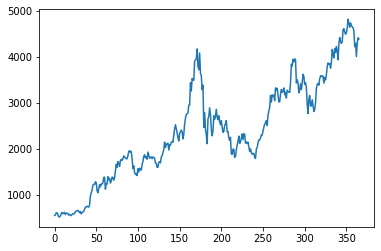

In [12]:
plt.plot(df['Close'])

In [13]:
df1=df['Close']

In [14]:
df1.head()

0    549.486633
1    558.068115
2    608.454041
3    603.897766
4    570.686646
Name: Close, dtype: float64

In [15]:
df1.head()

0    549.486633
1    558.068115
2    608.454041
3    603.897766
4    570.686646
Name: Close, dtype: float64

In [16]:
df1.tail()

361    4287.593750
362    4000.650879
363    4298.306641
364    4409.931152
365    4380.979980
Name: Close, dtype: float64

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
#splitting data menjadi data train dan data test
training_size = int(len(df1)*0.836066)
test_size = len(df1) - training_size
train_data, test_data = df1[0:,:],df1[training_size:len(df1),:]
time_train = df.iloc[:training_size,0]
time_valid = df.iloc[training_size:,0]

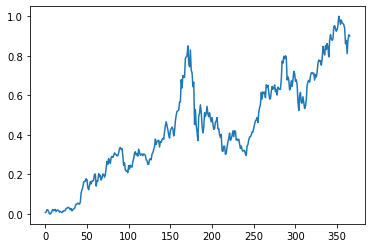

In [19]:
plt.plot(train_data)

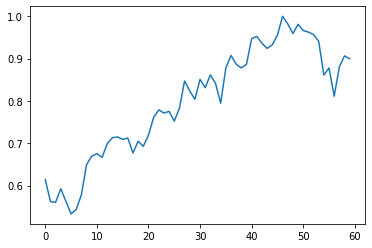

In [20]:
plt.plot(test_data)

In [21]:
training_size, test_size

(306, 60)

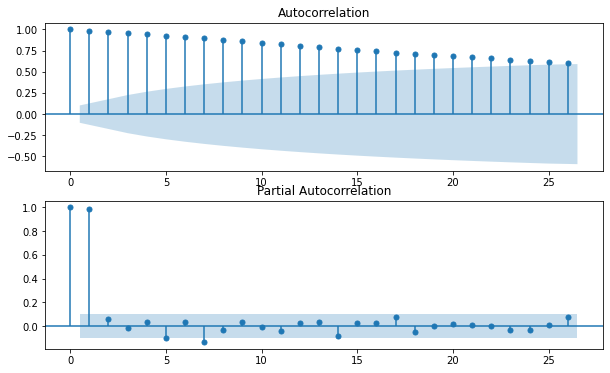

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0]=plot_acf(df.iloc[:,4],ax=ax[0])
ax[1]=plot_pacf(df.iloc[:,4],ax=ax[1])

In [23]:
#Mengubah array menjadi data matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-11):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step=3
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(Y_train.shape)

(352, 3)
(352,)


(None, None)

In [26]:
#reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
np.random.seed(123)
set_seed(123)

2022-10-28 05:10:02.103724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:02.259559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:02.260441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 05:10:02.261685: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 5)                 1005      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 162,611
Trainable params: 162,611
Non-trainable params: 0
_________________________________________________________________


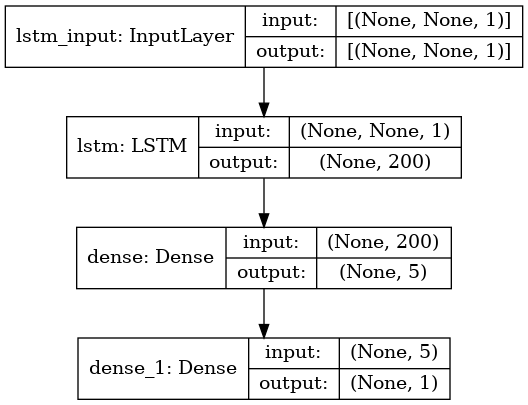

In [29]:
model = Sequential()
model.add(LSTM(200, input_shape=(None,1)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape'])
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='LSTM model.png', show_shapes=True)

In [30]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=25, batch_size=64, verbose=1)

2022-10-28 05:10:06.340782: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-10-28 05:10:08.682853: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


5/5 [==============================] - 4s 100ms/step - loss: 0.1775 - mae: 0.3657 - mape: 27715.9746 - val_loss: 0.6100 - val_mae: 0.7759 - val_mape: 93.2571
Epoch 2/25
5/5 [==============================] - 0s 8ms/step - loss: 0.1481 - mae: 0.3314 - mape: 50451.2734 - val_loss: 0.5110 - val_mae: 0.7098 - val_mape: 85.2750
Epoch 3/25
5/5 [==============================] - 0s 8ms/step - loss: 0.1142 - mae: 0.2896 - mape: 171849.3438 - val_loss: 0.3900 - val_mae: 0.6196 - val_mape: 74.3824
Epoch 4/25
5/5 [==============================] - 0s 8ms/step - loss: 0.0746 - mae: 0.2322 - mape: 262802.5000 - val_loss: 0.2431 - val_mae: 0.4883 - val_mape: 58.5258
Epoch 5/25
5/5 [==============================] - 0s 8ms/step - loss: 0.0348 - mae: 0.1524 - mape: 510838.5312 - val_loss: 0.0884 - val_mae: 0.2923 - val_mape: 34.8682
Epoch 6/25
5/5 [==============================] - 0s 7ms/step - loss: 0.0122 - mae: 0.0902 - mape: 701909.8750 - val_loss: 0.0056 - val_mae: 0.0642 - val_mape: 7.3802
Epoc

<Figure size 432x288 with 0 Axes>

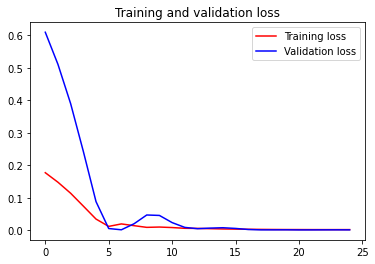

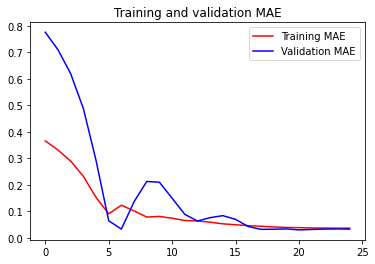

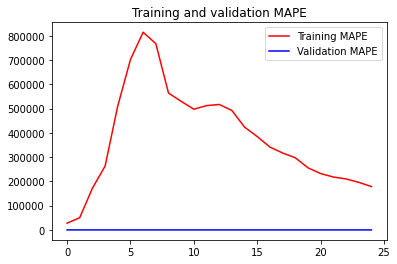

<Figure size 432x288 with 0 Axes>

In [31]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mae']
val_mae=history.history['val_mae']
mape=history.history['mape']
val_mape=history.history['val_mape']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mape, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mape, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

In [32]:
#loss, MAPE, MSE
test_eval=model.evaluate(X_test,Y_test)
for name, value in zip(model.metrics_names, test_eval):
    print(name,': ',value)
print()

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - mae: 0.0345 - mape: 4.4699
loss :  0.001878758193925023
mae :  0.0344504788517952
mape :  4.469927787780762



In [33]:
test_predict = model.predict(X_test)

In [34]:
test_predict1 = scaler.inverse_transform(test_predict)

In [35]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test, test_predict))

0.0433446477771208

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


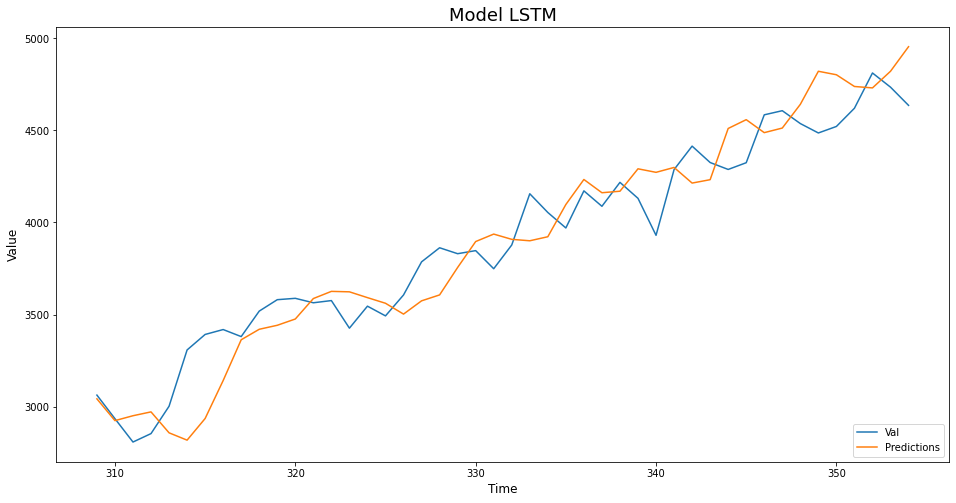

[[3041.8804]
 [2923.592 ]
 [2950.1565]
 [2971.0776]
 [2857.345 ]
 [2817.5488]
 [2935.0757]
 [3141.339 ]
 [3362.8247]
 [3419.8252]
 [3441.5037]
 [3475.625 ]
 [3586.7275]
 [3625.717 ]
 [3623.2578]
 [3591.7163]
 [3561.136 ]
 [3502.2483]
 [3574.319 ]
 [3606.476 ]
 [3755.5994]
 [3896.3848]
 [3936.9363]
 [3908.3943]
 [3900.578 ]
 [3922.5198]
 [4097.564 ]
 [4233.5327]
 [4161.5737]
 [4169.8066]
 [4291.5635]
 [4272.3794]
 [4298.944 ]
 [4214.0415]
 [4232.4463]
 [4510.6445]
 [4558.498 ]
 [4487.969 ]
 [4512.9453]
 [4641.7417]
 [4821.373 ]
 [4802.4546]
 [4738.773 ]
 [4731.0254]
 [4821.3853]
 [4954.9287]]


In [36]:
train = df[:training_size+3]
valid = df[training_size+3:len(df1)-11]
valid['Predictions'] = test_predict1
plt.figure(figsize=(16,8))
plt.title('Model LSTM', fontsize=18)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.show()
print(test_predict1)